<a href="https://colab.research.google.com/github/sergioberdiales/TFM_KSchool_Gijon_Air_Pollution/blob/master/22_Forecasting_Models_ML_1_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to try to improve the autoregressive forecasting models introducing more variables.
We will use the XGBoost algorithm. 

In [3]:
%pylab inline
import pandas as pd

# We install and import pyreadr, in order to read rds objects.  
# https://github.com/ofajardo/pyreadr

!pip install pyreadr
import pyreadr


# Importing models


import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Importing metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Model selection
from sklearn.model_selection import GridSearchCV

# Variable selection

import sklearn
from sklearn.feature_selection import f_regression


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We upload the train and test data. All rds files from this folder  ~\`TFM_KSchool_Gijon_Air_Pollution\train_test\Prediction_Models_ML_0_AR

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X_test_NO2_201701_201709.rds to X_test_NO2_201701_201709 (2).rds
Saving X_test_NO2_20170101_20170114.rds to X_test_NO2_20170101_20170114 (2).rds
Saving X_test_PM10_201701_201709.rds to X_test_PM10_201701_201709 (2).rds
Saving X_test_PM10_201701_201709_var.rds to X_test_PM10_201701_201709_var.rds
Saving X_test_PM10_20170101_20170114.rds to X_test_PM10_20170101_20170114 (2).rds
Saving X_test_PM10_20170101_20170114_var.rds to X_test_PM10_20170101_20170114_var.rds
Saving X_train_NO2_200901_201612.rds to X_train_NO2_200901_201612 (2).rds
Saving X_train_NO2_201401_201612.rds to X_train_NO2_201401_201612 (1).rds
Saving X_train_NO2_201610_201612.rds to X_train_NO2_201610_201612 (1).rds
Saving X_train_PM10_200901_201612.rds to X_train_PM10_200901_201612 (1).rds
Saving X_train_PM10_200901_201612_var.rds to X_train_PM10_200901_201612_var.rds
Saving X_train_PM10_201401_201612.rds to X_train_PM10_201401_201612 (1).rds
Saving X_train_PM10_201401_201612_var.rds to X_train_PM10_201401_201612_va

In [8]:
X_train = pyreadr.read_r("X_train_PM10_201401_201612_var.rds")
y_train = pyreadr.read_r("y_train_PM10_201401_201612_var.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709_var.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709_var.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]





,PM10_1,PM10_2,PM10_3,PM10_4,PM10_5,PM10_6,PM10_7,PM10_8,PM10_9,PM10_10,...,PM10_26,PM10_27,PM10_48,PM10_72,PM10_96,PM10_120,PM10_144,PM10_168,no_lab_days_lab,no_lab_days_no_lab
0,51.0,62.0,54.0,49.0,51.0,64.0,70.0,93.0,63.0,50.0,...,41.0,37.0,9.0,11.0,38.0,16.0,21.0,14.0,1,0
1,57.0,51.0,62.0,54.0,49.0,51.0,64.0,70.0,93.0,63.0,...,53.0,41.0,5.0,17.0,29.0,8.0,23.0,22.0,1,0
2,51.0,57.0,51.0,62.0,54.0,49.0,51.0,64.0,70.0,93.0,...,65.0,53.0,5.0,15.0,25.0,7.0,40.0,20.0,1,0
3,34.0,51.0,57.0,51.0,62.0,54.0,49.0,51.0,64.0,70.0,...,38.0,65.0,3.0,10.0,36.0,5.0,26.0,16.0,1,0
4,29.0,34.0,51.0,57.0,51.0,62.0,54.0,49.0,51.0,64.0,...,21.0,38.0,3.0,4.0,17.0,20.0,25.0,21.0,1,0


### LINEAR REGRESSION

In [9]:
X_train = pyreadr.read_r("X_train_PM10_201401_201612_var.rds")
y_train = pyreadr.read_r("y_train_PM10_201401_201612_var.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709_var.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709_var.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]

X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)


regLR = LinearRegression()
regLR.fit(X_train, y_train)


# Compute train scores

y_pred = regLR.predict(X_train)

r2_train = r2_score(y_train, y_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
mae_train = mean_absolute_error(y_train, y_pred)
r2_adjusted_train = 1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
sd_train = std(y_train)

print("R^2 train: {}".format(r2_train))
print("R^2 adjusted train: {}".format(r2_adjusted_train))
print("Mean Absolute Error train: {}".format(mae_train))
print("Root Mean Squared Error train: {}".format(rmse_train)) 
print("Standard Deviation train: {}".format(sd_train))  

# Compute test scores

y_pred = regLR.predict(X_test)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_adjusted_test = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
sd_test = std(y_test)

print("R^2 test: {}".format(r2_test))
print("R^2 adjusted test: {}".format(r2_adjusted_test))
print("Mean Absolute Error test: {}".format(mae_test))
print("Root Mean Squared Error test: {}".format(rmse_test))
print("Standard Deviation test: {}".format(sd_test))  


R^2 train: 0.6102203733635343
R^2 adjusted train: 0.6096976803776233
Mean Absolute Error train: 5.695427471509776
Root Mean Squared Error train: 9.202351345112561
Standard Deviation train: PM10_0    14.73972
dtype: float64
R^2 test: 0.5967704170107037
R^2 adjusted test: 0.5945468412418955
Mean Absolute Error test: 4.817116498111848
Root Mean Squared Error test: 6.825925984465093
Standard Deviation test: PM10_0    10.749429
dtype: float64


### XGBOOST

In [13]:
X_train = pyreadr.read_r("X_train_PM10_201401_201612_var.rds")
y_train = pyreadr.read_r("y_train_PM10_201401_201612_var.rds")

X_test = pyreadr.read_r("X_test_PM10_201701_201709_var.rds")
y_test = pyreadr.read_r("y_test_PM10_201701_201709_var.rds")

X_train = X_train[None]
y_train = y_train[None]
X_test = X_test[None]
y_test = y_test[None]

X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)

X_train = X_train[['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_22', 'PM10_23', 'PM10_24', 'PM10_48', 'PM10_72', 'PM10_96', 'PM10_120', 'PM10_144', 'PM10_168', 'no_lab_days_lab', 'no_lab_days_no_lab']]
X_test = X_test[['PM10_1', 'PM10_2', 'PM10_3', 'PM10_4', 'PM10_22', 'PM10_23', 'PM10_24', 'PM10_48', 'PM10_72', 'PM10_96', 'PM10_120', 'PM10_144', 'PM10_168', 'no_lab_days_lab', 'no_lab_days_no_lab']]


regXGB = XGBRegressor(n_estimators=500, min_samples_leaf=10,max_depth=2, random_state=42)
regXGB.fit(X_train,y_train)


# Compute train scores

y_pred = regXGB.predict(X_train)

r2_train = r2_score(y_train, y_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
mae_train = mean_absolute_error(y_train, y_pred)
r2_adjusted_train = 1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
sd_train = std(y_train)

print("R^2 train: {}".format(r2_train))
print("R^2 adjusted train: {}".format(r2_adjusted_train))
print("Mean Absolute Error train: {}".format(mae_train))
print("Root Mean Squared Error train: {}".format(rmse_train)) 
print("Standard Deviation train: {}".format(sd_train))  

# Compute test scores

y_pred = regXGB.predict(X_test)

r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_adjusted_test = 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
sd_test = std(y_test)

print("R^2 test: {}".format(r2_test))
print("R^2 adjusted test: {}".format(r2_adjusted_test))
print("Mean Absolute Error test: {}".format(mae_test))
print("Root Mean Squared Error test: {}".format(rmse_test))
print("Standard Deviation test: {}".format(sd_test))  


R^2 train: 0.6627120513006217
R^2 adjusted train: 0.6625183560774023
Mean Absolute Error train: 5.4576274657851185
Root Mean Squared Error train: 8.560313206122496
Standard Deviation train: PM10_0    14.73972
dtype: float64
R^2 test: 0.5990393212714499
R^2 adjusted test: 0.598094698971948
Mean Absolute Error test: 4.799518734593902
Root Mean Squared Error test: 6.80669473145613
Standard Deviation test: PM10_0    10.749429
dtype: float64



# **Mejores resultados antes de este notebook**
Resultados XGBoost con los siguientes parametros (y con hour, month y weekday)

regXGB = GridSearchCV(XGBRegressor(n_estimators=100, min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
                   
  Mejores parametros {'max_depth': 3, 'min_samples_leaf': 10}
  
  Train
  
R2 = 0.6500857644451381
rmse =  8.861409992242404

 Test
  
R2 = 0.6122589338516852
rmse =  6.804600716948688

Es el mejor R2 que he obtenido hasta ahora. Pero todavía se me antoja muy bajo. Y sobre todo un rmse muy alto. 
                   
                   
Si subimos los n estimators a 350 mejora un poco el resultado en test, a partir de ahi empieza a empeorar (overfitting). Pendiente hacer un grafico con la evolucion del R2 segun vamos variando el numero de estimators.

Esto lo he hecho con los mejores parametros elegidos por gridsearchcv. Habria que combinar las tres variables en un gridsearch?
 

**Resultados de este notebook**

Me quedo con xgboost. 
Incluir variables lagged de no2 y so2 para mejorar el modelo de pm10

Pues obtengo peores resultados

Resultados en train

0.6999916104541364

0.6993441272715504

8.199388923966012

Resultados en test

0.6064956206343766

0.6031155267931912

6.862638536821753


Incluyo tambien los niveles del O3. Mejora un poquito, muy poco.

En este caso en train sube

0.7105443286766205

0.7098740820279518

8.053892316950074


Test

0.6082040880935934

0.604591655088049

6.84772466415434

Al introducir la variable lab (sin o3 )tampoco se mueve mucho

Train

0.7010470857165632

0.7003784709431913

8.184354312220824

Test

0.6053976949516295

0.6018925786375019

6.867154043380078

### Al incluir la variable vv (fuerza viento) el modelo mejora un poco

Train

0.7075842640028696

0.7068842655766931

8.094376414198711

Test

0.6152870917971485

0.6116277299695523

6.780556822850893

### Al incluir la variable wd (direcci'on viento) el modelo mejora otro poco (mas en train que en test)

Train

0.7115234312666878

0.7101047684650643

8.039671399926052

Test

0.6194624718864719

0.6119703958092643

6.743660947199181

### Incluimos el valor de pm10 de una hora menos de la estacion Argentina, mas proxima a los focos de contaminacion industrial
Mejora un poco mas

Train

0.718860331470167

0.7174579165592537

7.93632092440623

Test

0.6204075122922108

0.6128144572912294

6.731793806147569

### Al incluir el pm25 t-1 empeoramos el modelo

0.7158746433859251
0.7144418889570989
7.984338653641078

0.6147745549714891
0.6070051994817923
6.781618222268876

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We upload the train and test data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X_test_201701_201709.csv to X_test_201701_201709.csv
Saving y_test_201701_201709.csv to y_test_201701_201709.csv
Saving X_train_2014_2016.csv to X_train_2014_2016.csv
Saving y_train_2014_2016.csv to y_train_2014_2016.csv
User uploaded file "X_test_201701_201709.csv" with length 513161 bytes
User uploaded file "y_test_201701_201709.csv" with length 18546 bytes
User uploaded file "X_train_2014_2016.csv" with length 2025029 bytes
User uploaded file "y_train_2014_2016.csv" with length 73801 bytes


In [0]:
!ls

gdrive	     X_test_201701_201709_6h.csv  y_test_201701_201709_6h.csv
sample_data  X_train_2014_2016_6h.csv	  y_train_2014_2016_6h.csv


In [0]:
 !rm *.csv*

rm: cannot remove '*.csv*': No such file or directory


In [0]:
#X_train = pd.read_csv("X_train_lite.csv")
#y_train = pd.read_csv("y_train_lite.csv")

X_train = pd.read_csv("X_train_2014_2016.csv")
y_train = pd.read_csv("y_train_2014_2016.csv")

#X_train = pd.read_csv("X_train_2009_2016.csv")
#y_train = pd.read_csv("y_train_2009_2016.csv")

X_test = pd.read_csv("X_test_201701_201709.csv")
y_test = pd.read_csv("y_test_201701_201709.csv")

#X_test = pd.read_csv("X_test.csv")
#y_test = pd.read_csv("y_test.csv")

In [0]:
X_train.head()

,PM10_1_arg,hour,week_day,month,lab,PM10_1,PM10_2,PM10_3,PM10_4,NO2_1,...,SO2_4,vv_1,vv_2,vv_3,vv_4,wd_1,wd_2,wd_3,wd_4,PM25_1
0,18,4,3,1,no_lab,21,16,20,22,29,...,2,0.11,0.10,0.17,0.23,SSW,SSE,WS,S,17
1,19,5,3,1,no_lab,14,21,16,20,20,...,3,0.10,0.11,0.10,0.17,SE,SSW,SSE,WS,10
2,15,6,3,1,no_lab,14,14,21,16,23,...,2,0.11,0.10,0.11,0.10,SW,SE,SSW,SSE,16
3,9,7,3,1,no_lab,12,14,14,21,23,...,2,0.10,0.11,0.10,0.11,SSW,SW,SE,SSW,17
4,8,8,3,1,no_lab,9,12,14,14,20,...,2,0.91,0.10,0.11,0.10,SE,SSW,SW,SE,16


In [0]:
X_test.head()

,PM10_1_arg,hour,week_day,month,lab,PM10_1,PM10_2,PM10_3,PM10_4,NO2_1,...,SO2_4,vv_1,vv_2,vv_3,vv_4,wd_1,wd_2,wd_3,wd_4,PM25_1
0,42,4,7,1,no_lab,36,35,38,46,40,...,3,0.10,0.11,0.11,0.10,WNW,W,W,SSW,24
1,42,5,7,1,no_lab,31,36,35,38,39,...,3,0.11,0.10,0.11,0.11,W,WNW,W,W,32
2,38,6,7,1,no_lab,22,31,36,35,37,...,5,0.12,0.11,0.10,0.11,WNW,W,WNW,W,21
3,41,7,7,1,no_lab,32,22,31,36,40,...,7,0.11,0.12,0.11,0.10,WNW,WNW,W,WNW,29
4,46,8,7,1,no_lab,21,32,22,31,38,...,8,0.10,0.11,0.12,0.11,NW,WNW,WNW,W,29


Convertimos a strings las variables hour, week_day y month

In [0]:
X_train.hour = X_train.hour.astype(str)
X_test.hour = X_test.hour.astype(str)


X_train.week_day = X_train.week_day.astype(str)
X_test.week_day = X_test.week_day.astype(str)

X_train.month = X_train.month.astype(str)
X_test.month = X_test.month.astype(str)

One hot encoding

In [0]:
X_train = pd.get_dummies(X_train)
X_test  = pd.get_dummies(X_test)

In [0]:
X_train.info(null_counts=True, verbose=True)

In [0]:
X_train.shape

(25544, 125)

In [0]:
X_test.shape

(6475, 122)

Al hacer el one hot encoding el X_train y el X_test tienen distintas dimensiones. X_train tiene 47 variables y X_test 44. Por que? Porque el dataset de test tiene solo 9 meses, de enero a septiembre, y entonces la variable month solo se convierte en 9 variables, mientras que el dataset tendriamos 12, los 12 meses del anho. 
Con el siguiente codigo solucionamos el problema (falta referencia)

In [0]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
# This code also ensure that column resulting from category in the test dataset but not present in the training dataset will be removed

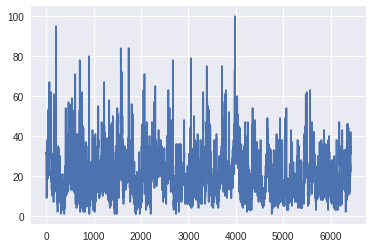

In [0]:
plt.plot(y_test["PM10_0"]);

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



XGBoost

In [0]:
from xgboost import XGBRegressor
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#regXGB = GridSearchCV(XGBRegressor(n_estimators=100, min_samples_leaf=1,max_depth=4),
 #                  param_grid={"min_samples_leaf":[10,20,30,40,70,100],
  #                            "max_depth":range(2,10)},
   #                scoring="neg_mean_squared_error")

regXGB = XGBRegressor(n_estimators=350, min_samples_leaf=10,max_depth=3)

regXGB.fit(X_train,y_train)

#print(regXGB.best_params_)
#print(regXGB.best_score_)
#print(np.sqrt(-regXGB.best_score_))
#print(mean_absolute_error(y_test, y_pred))


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, min_samples_leaf=10, missing=None,
       n_estimators=350, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:
# Evaluacion con train

y_pred = regXGB.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)
r2_adjusted = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r2_adjusted)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)

0.7158746433859251
0.7144418889570989
7.984338653641078


In [0]:
# Evaluacion con test
y_pred = regXGB.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
r2_adjusted = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r2_adjusted)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.6147745549714891
0.6070051994817923
6.781618222268876


In [0]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
regXGB = GridSearchCV(XGBRegressor(n_estimators=350, min_samples_leaf=1,max_depth=4),
                   param_grid={"n_estimators":[100, 200, 300, 400, 500, 1000],
                                "min_samples_leaf":[10,20,30,40,70,100],
                                  "max_depth":range(2,10)},
                                    scoring="neg_mean_squared_error")

regXGB.fit(X_train,y_train)

print(regXGB.best_params_)
print(regXGB.best_score_)
print(np.sqrt(-regXGB.best_score_))
print(mean_absolute_error(y_test, y_pred))


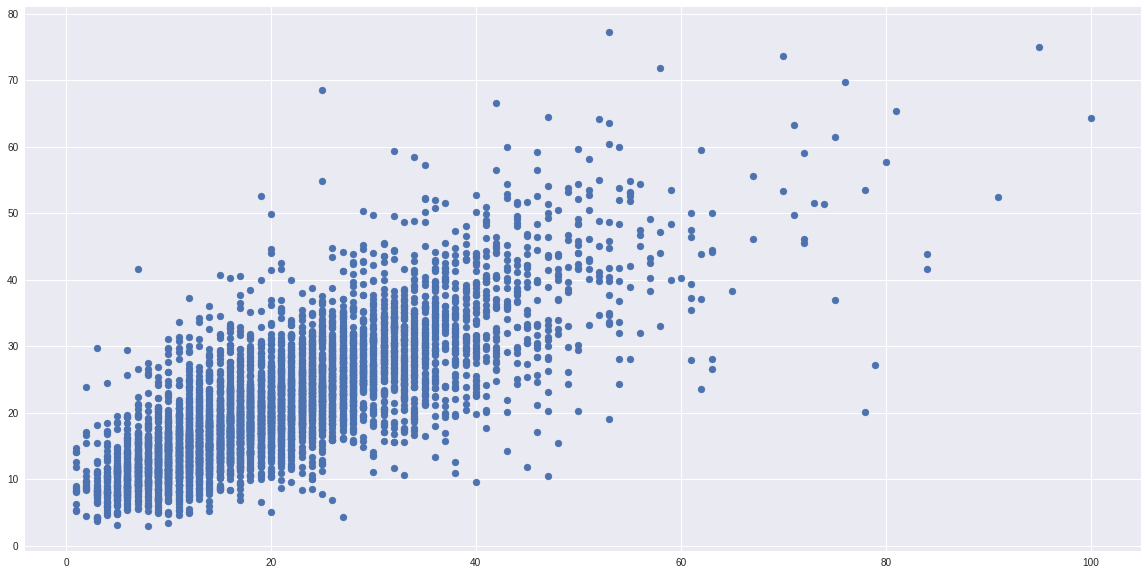

In [0]:
y_pred = y_pred.astype(float)
y_test = pd.DataFrame(y_test)
y_test = y_test.values
y_pred = pd.DataFrame(y_pred)
plt.figure(figsize=(20,10))
plt.scatter(x = y_test, y = y_pred)